<h1 align="center">Relación lineal entre los precios de Bitcoin y Ethereum</h1>
<h2 align="center">MEA519-01</h2>
<h3 align="center">Autor: Pablo Perez, Wittenberg Corniel</h3>
<h3 align="center">ID: 1064601, 1107854</h3>

En el mundo de las criptomonedas, la relación entre diferentes activos digitales es de gran interés para los inversores y analistas. En este contexto, hemos desarrollado un modelo de regresión lineal para explorar la relación entre los precios de dos criptomonedas populares: Bitcoin (BTC) y Ethereum (ETH).

El objetivo principal de nuestro modelo es entender cómo los movimientos en el precio de Bitcoin pueden influir en el precio de Ethereum. Utilizando una regresión lineal, buscamos establecer una relación cuantitativa entre estos dos activos digitales. El modelo considera el precio de Bitcoin como la variable independiente (predictora) y el precio de Ethereum como la variable dependiente (objetivo de predicción).

In [2]:
# Librerias necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [3]:
# Carga de los datos
ruta_archivo = r"C:\Users\pablo\OneDrive\Documentos\data_ln.xlsx"
data = pd.read_excel(ruta_archivo)

In [16]:
# Estadisticas descriptivas 
btc_stats = data['Precio BTC'].describe()
eth_stats = data['Precio ETH'].describe()

print("Estadísticas de Precio BTC:")
print(btc_stats)

print("\nEstadísticas de Precio ETH:")
print(eth_stats)


Estadísticas de Precio BTC:
count       79.000000
mean     18523.419347
std      16153.977252
min        970.403015
25%       6799.544893
50%      10397.900391
75%      29115.915350
max      61318.957767
Name: Precio BTC, dtype: float64

Estadísticas de Precio ETH:
count      79.000000
mean     1070.448316
std      1125.774503
min        10.727500
25%       213.128101
50%       447.114014
75%      1751.769719
max      4631.478795
Name: Precio ETH, dtype: float64


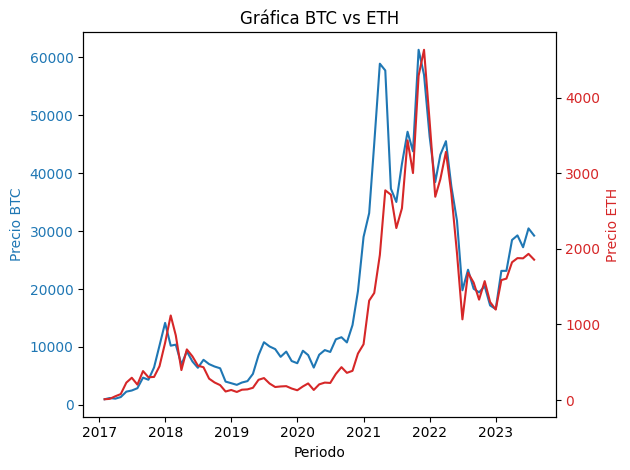

In [4]:
# Gráfica de los datos
fig, ax1 = plt.subplots()

# Eje para la variable Precio BTC
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Precio BTC', color='tab:blue')
ax1.plot(data['periodo'], data['Precio BTC'], color='tab:blue', label='BTC')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje para la variable Precio ETH
ax2 = ax1.twinx()
ax2.set_ylabel('Precio ETH', color='tab:red')
ax2.plot(data['periodo'], data['Precio ETH'], color='tab:red', label='ETH')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y leyendas
plt.title('Gráfica BTC vs ETH')
fig.tight_layout()

plt.show()

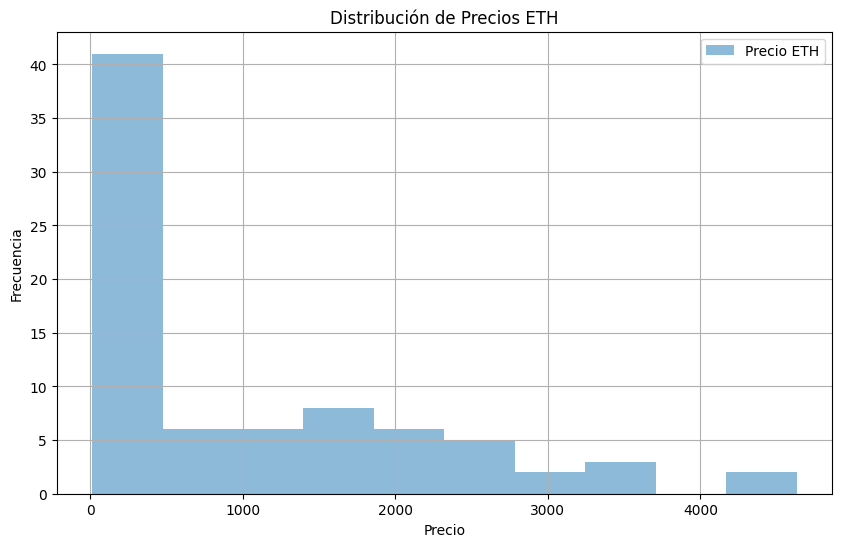

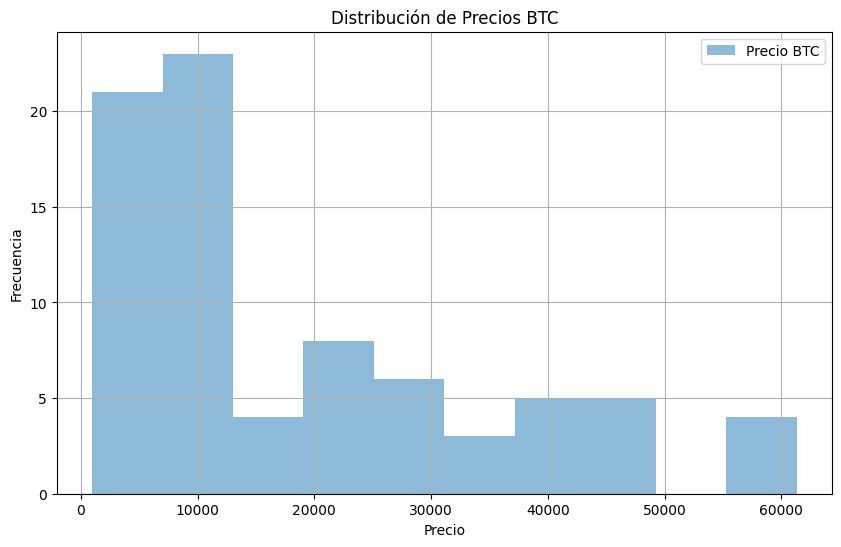

In [15]:
#Histograma de los datos
plt.figure(figsize=(10, 6))
plt.hist(data['Precio ETH'], bins=10, alpha=0.5, label='Precio ETH')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios ETH')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Precio BTC'], bins=10, alpha=0.5, label='Precio BTC')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios BTC')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
data['Cambio_Porcentual_BTC'] = data['Precio BTC'].pct_change() * 100
data['Cambio_Porcentual_ETH'] = data['Precio ETH'].pct_change() * 100

print(data[['periodo', 'Cambio_Porcentual_BTC', 'Cambio_Porcentual_ETH']])


      periodo  Cambio_Porcentual_BTC  Cambio_Porcentual_ETH
0  2017-01-31                    NaN                    NaN
1  2017-02-28              21.595868              47.445349
2  2017-03-31              -9.168024             216.347401
3  2017-04-30              25.760640              57.924592
4  2017-05-31              69.628819             191.907742
..        ...                    ...                    ...
74 2023-03-31              23.031278              13.458350
75 2023-04-30               2.775156               3.013257
76 2023-05-31              -7.001134              -0.148855
77 2023-06-30              11.967794               3.151251
78 2023-07-31              -4.092037              -3.984434

[79 rows x 3 columns]


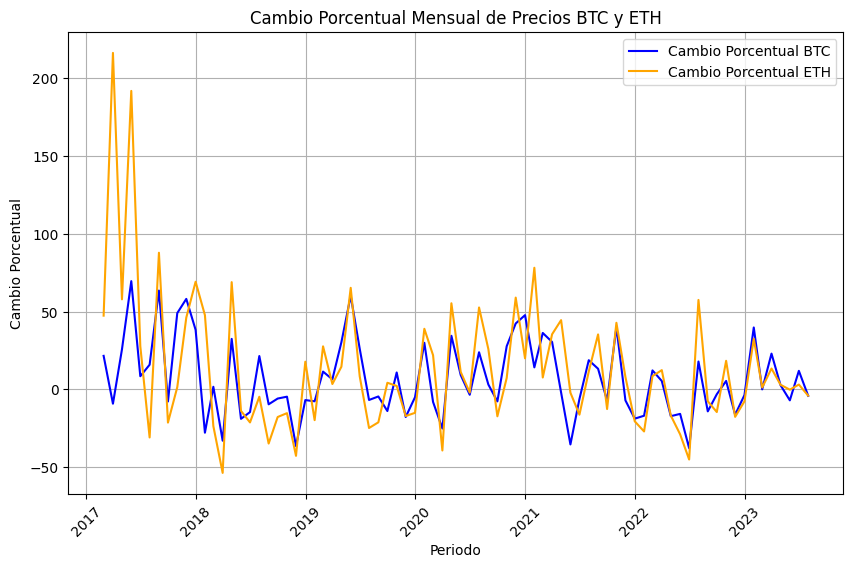

In [22]:
# Gráfica de cambios porcentuales en los precios
plt.figure(figsize=(10, 6))
plt.plot(data['periodo'], data['Cambio_Porcentual_BTC'], color='blue', label='Cambio Porcentual BTC')
plt.plot(data['periodo'], data['Cambio_Porcentual_ETH'], color='orange', label='Cambio Porcentual ETH')
plt.xlabel('Periodo')
plt.ylabel('Cambio Porcentual')
plt.title('Cambio Porcentual Mensual de Precios BTC y ETH')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [5]:
# Construcción del modelo lineal
# Extraer las columnas necesarias
X = data[['Precio BTC']]
y = data['Precio ETH']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [6]:
# Coeficientes del modelo
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Imprimir los resultados
print(f"Coeficiente: {coeficiente}")
print(f"Intercepto: {intercepto}")
correlacion = data['Precio BTC'].corr(data['Precio ETH'])

print(f"Correlación entre BTC y ETH: {correlacion}")

Coeficiente: 0.0648047796711524
Intercepto: -129.95779355706622
Correlación entre BTC y ETH: 0.9298975361296503


Precio ETH = 0.0648047796711524 * Precio BTC - 129.95779355706622

Interpretación de los coeficientes:

El coeficiente 0.0648047796711524 significa que por cada unidad de cambio en el precio de Bitcoin (BTC), se espera un cambio de aproximadamente 0.0648 en el precio de Ethereum (ETH). Esto sugiere una relación lineal positiva entre los precios de BTC y ETH.

El intercepto -129.95779355706622 representa el valor esperado del precio de Ethereum cuando el precio de Bitcoin es igual a cero. Sin embargo, este valor no tiene mucho sentido práctico en este contexto, ya que es poco probable que el precio de Bitcoin sea cero.

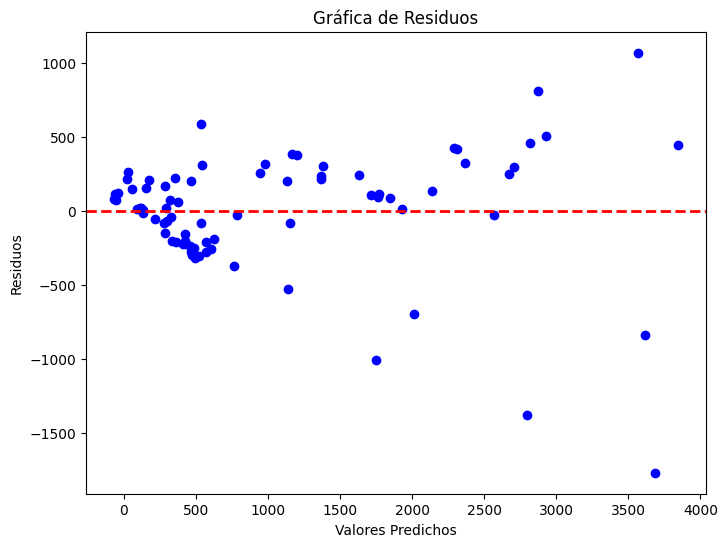

In [7]:
# Gráfica de los residuos
y_pred = modelo.predict(X)
residuos = y - y_pred

# Crear gráfica de los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, c='blue', marker='o')
plt.title('Gráfica de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linewidth=2, linestyle='--')  # Línea en y=0 para referencia
plt.show()

In [8]:
# Calcular R cuadrado y MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R cuadrado: {r2}")
print(f"Error cuadrático medio (MSE): {mse}")

R cuadrado: 0.8647094276999949
Error cuadrático medio (MSE): 169292.55600805528


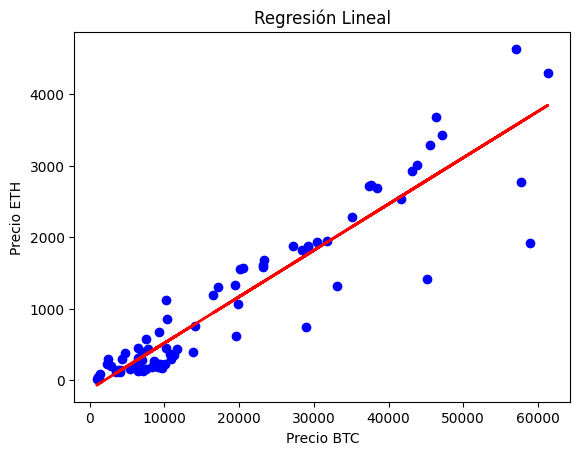

In [9]:
# Gráfica de regresión 
plt.scatter(X, y, color='blue')
plt.plot(X, modelo.predict(X), color='red', linewidth=2)
plt.title('Regresión Lineal')
plt.xlabel('Precio BTC')
plt.ylabel('Precio ETH')
plt.show()

In [10]:
# Modelo OLS
# Agregar una constante a la matriz X (para el término independiente)
X = sm.add_constant(data['Precio BTC'])

# Crear y ajustar el modelo de regresión lineal
modelo = sm.OLS(data['Precio ETH'], X).fit()

# Obtener el summary del modelo
tabla_resultados = modelo.summary()
print(tabla_resultados)

                            OLS Regression Results                            
Dep. Variable:             Precio ETH   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     492.1
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           3.48e-35
Time:                        12:21:13   Log-Likelihood:                -587.65
No. Observations:                  79   AIC:                             1179.
Df Residuals:                      77   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -129.9578     71.600     -1.815      0.0